In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Одна итерация QR алгоритма


- Одна итерация QR алгоритма имеет следующий вид:
$$
A_{k}=Q_{k} R_{k}, \quad A_{k+1}=R_{k} Q_{k}
$$
- Если \$А_0 = A\$ симметричная трёхдиагональная матрица , то эта форма сохраняется.
- Давайте это проверим!

array([ 2.17937074, -0.12943126,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

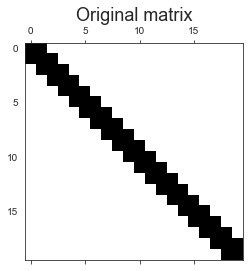

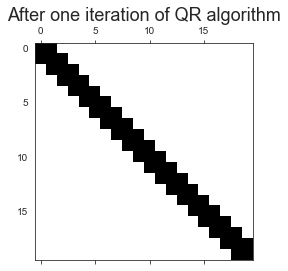

In [5]:
%matplotlib inline

sns.set_style('white')

#Generate a random tridiagonal matrix
n = 20
d = np.random.randn(n)
sub_diag = np.random.randn(n-1)

mat = np.diag(d) + np.diag(sub_diag, -1) + np.diag(sub_diag, 1)
plt.spy(mat)
plt.title("Original matrix", fontsize=18)
q, r = np.linalg.qr(mat)
plt.figure()
b = r.dot(q)
b[abs(b) <= 1e-12] = 0
plt.spy(b)
plt.title("After one iteration of QR algorithm", fontsize=18)
#plt.figure()
#plt.imshow(np.abs(r.dot(q)))
b[0, :]

## QR-алгоритм.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def qr_algorithm(A, num_iter, eps):
    T = A.copy()
    U = np.eye(A.shape[0])
    conv = [(T, U)]
    for i in range(num_iter):
        Q, R = np.linalg.qr(T)
        T = R @ Q
        U = U @ Q
        conv.append((T, U))
        if np.sum(np.abs(np.tril(T, k=-1))) < eps:
            break
    return T, U, conv[1:]

In [2]:
n = 7
A = np.random.randn(n, n)
# A = A.T @ A
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)

[ 7.835098   -9.09841546  3.89574444  1.50349755 -3.85242527 -1.88817162
 -1.39379345]


In [3]:
T, U, conv = qr_algorithm(A, 2000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))

2.556541014180726e-13


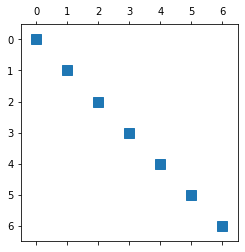

In [4]:
plt.spy(T, markersize=10, precision=1e-6)


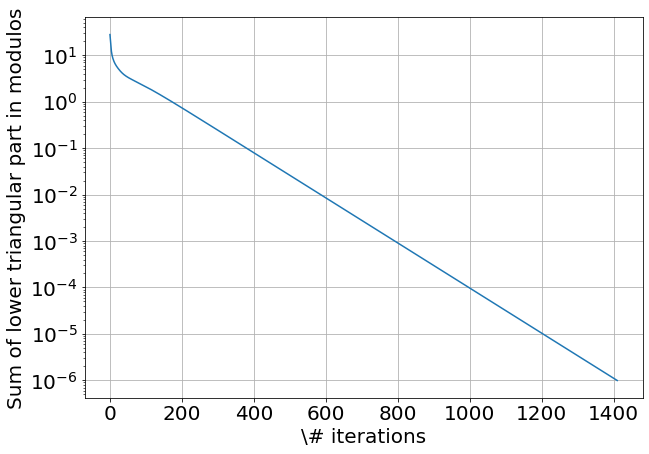

In [5]:
plt.figure(figsize=(10, 7))
conv_qr = np.array([np.sum(np.abs(np.tril(T, k=-1))) for T, U in conv])
plt.plot(conv_qr)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations", fontsize=20)
plt.ylabel("Sum of lower triangular part in modulos", fontsize=20)
plt.grid(True)

In [6]:
U.round(4), true_eigvec.round(4)


(array([[-0.2768,  0.2067, -0.429 ,  0.2858, -0.6902, -0.3571, -0.105 ],
        [ 0.9067,  0.0835, -0.2503, -0.1081, -0.0753, -0.242 , -0.1798],
        [-0.2219,  0.3461,  0.2277, -0.4519,  0.1015, -0.2507, -0.7083],
        [-0.0607, -0.1779, -0.3439, -0.7198, -0.3542,  0.4446,  0.0725],
        [-0.0104, -0.2936, -0.3371,  0.3882,  0.1425,  0.4669, -0.6411],
        [ 0.0181,  0.8335, -0.2573,  0.0845,  0.2022,  0.4107,  0.1485],
        [-0.2188, -0.1339, -0.6351, -0.163 ,  0.5666, -0.4083,  0.1286]]),
 array([[-0.2067, -0.2768,  0.429 ,  0.3571, -0.2858, -0.6902, -0.105 ],
        [-0.0835,  0.9067,  0.2503,  0.242 ,  0.1081, -0.0753, -0.1798],
        [-0.3461, -0.2219, -0.2277,  0.2507,  0.4519,  0.1015, -0.7083],
        [ 0.1779, -0.0607,  0.3439, -0.4446,  0.7198, -0.3542,  0.0725],
        [ 0.2936, -0.0104,  0.3371, -0.4669, -0.3882,  0.1425, -0.6411],
        [-0.8335,  0.0181,  0.2573, -0.4107, -0.0845,  0.2022,  0.1485],
        [ 0.1339, -0.2188,  0.6351,  0.4083,  0.1

## Стохастическая матрица и собственное значение равное 1.




Утверждение. 
Пусть дана матрица $А$, в которой элементы неотрицательны и сумма в каждой строке равна $1 .$ Тогда 1 максимальное собственное значение такой матрицы.

Доказательство.
- Возьмём вектор $ \mathrm{v} $ из всех 1 и вычислим $ Av$.
- В силу равенства 1 суммы элементов в каждой строке $ Av$ также будет вектором из всех $1 .$
- Значит вектор $v$ собственный вектор для собственного значения 1
- Теперь воспользуемся теоремой Гершгорина: все собственные значения лежат в объединении кругов с центром в точках \$а_\{ii\}\$ и радиусом \$1 - а_\{ii\}\$
- Значит ни один из шаров не имеет точек расположенных дальше 1 и -1
- А значит и все собственные значения по модулю меньше 1

# Задача.              

Сгенерируйте случайным образом много таких матриц и для каждой проверьте утверждение.

In [5]:
def get_rand_mat(size=None): 
    A = np.random.uniform(0, 1, size)
    for i in range(size[0]):
        A[i,:] = A[i,:] / A[i,:].sum()
    return A

In [6]:
A = get_rand_mat((3,3))
print(A)

NameError: name 'np' is not defined

In [22]:
A.sum(axis=1)

array([1., 1., 1.])

In [24]:
experiment = np.zeros((20, 2))
for n in range(1, 21):
    lambd = []
    for rep in range(20):
        A = get_rand_mat((n,n))
        lambd.append(np.abs(np.linalg.eigvals(A)).max())
    lambd0 = max(lambd)
    experiment[n-1, 0] = n
    experiment[n-1, 1] = lambd0
    

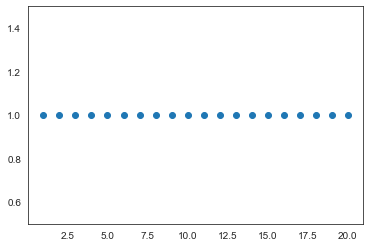

In [35]:
plt.plot(experiment[:,0], experiment[:,1], 'o')
plt.ylim([0.5,1.5])
plt.show()

Легко видеть, что максимумы собственных значений равны 1.

## Метод Якоби


- Вспомним что такое вращения Гивенса (Якоби):
на плоскости им соответствуют ортогональные матрицы вида
$$
\left(\begin{array}{cc}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{array}\right)
$$
а в $n$-мерном пространстве мы выбираем два индекса і и ји вращаем относительно соответствующих элементов $n$-мерного вектора.

- Идея метода Якоби состоит в минимизации суммы квадратов недиагональных элементов:
$$
\Gamma(A)=\operatorname{off}\left(U^{*} A U\right), \quad \text { off }^{2}(X)=\sum_{i \neq j}\left|X_{i j}\right|^{2}=\|X\|_{F}^{2}-\sum_{i=1}^{n} x_{i i}^{2}
$$
с помощью последовательных вращений Якоби для их зануления.
- Когда элементы выбраны, их легко занулить.
- Главный вопрос: в каком порядке нужно проводить зануление?
- Если мы всегда зануляем максимальный недиагональный элемент, метод имеет глобально линейную сходимость и локально квадратичную.
- На практике используется циклический порядок

Метод Якоби был первым численным методом для вычисления собственных значений, предложен в 1846. Преимущество:

Большая константа в оценке сложности

Очень точный (высокая относительная точность для малых собственных значений по сравнению с другими методами)

Хорошая возможность параллелизации 

# Задача. 

Реализовать метод Якоби.

In [4]:
## module jacobi
''' lam,x = jacobi(a,tol = 1.0e-9).
    Solution of std. eigenvalue problem [a]{x} = lam{x}
    by Jacobi's method. Returns eigenvalues in vector {lam}
    and the eigenvectors as columns of matrix [x].
'''
# from numpy import array,identity,diagonal
from math import sqrt

def get_jacobi(a,tol = 1e-8): # Jacobi method

    def maxElem(a): # Find largest off-diag. element a[k,l]
        n = len(a)
        aMax = 0.0
        for i in range(n-1):
            for j in range(i+1,n):
                if abs(a[i,j]) >= aMax:
                    aMax = abs(a[i,j])
                    k = i; l = j
        return aMax,k,l

    def rotate(a,p,k,l): # Rotate to make a[k,l] = 0
        n = len(a)
        aDiff = a[l,l] - a[k,k]
        if abs(a[k,l]) < abs(aDiff)*1e-36: 
            t = a[k,l]/aDiff
        else:
            phi = aDiff/(2.0*a[k,l])
            t = 1.0/(abs(phi) + sqrt(phi**2 + 1.0))
            if phi < 0.0:
                t = -t
                
        # sine and cosine 
        
        c = 1.0/sqrt(t**2 + 1.0)
        s = t*c
        
        tau = s/(1.0 + c)
        temp = a[k,l]
        a[k,l] = 0.0
        a[k,k] = a[k,k] - t*temp
        a[l,l] = a[l,l] + t*temp
        
        for i in range(k):      # Case of i < k
            temp = a[i,k]
            a[i,k] = temp - s*(a[i,l] + tau*temp)
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(k+1,l):  # Case of k < i < l
            temp = a[k,i]
            a[k,i] = temp - s*(a[i,l] + tau*a[k,i])
            a[i,l] = a[i,l] + s*(temp - tau*a[i,l])
        for i in range(l+1,n):  # Case of i > l
            temp = a[k,i]
            a[k,i] = temp - s*(a[l,i] + tau*temp)
            a[l,i] = a[l,i] + s*(temp - tau*a[l,i])
        for i in range(n):      # Update transformation matrix
            temp = p[i,k]
            p[i,k] = temp - s*(p[i,l] + tau*p[i,k])
            p[i,l] = p[i,l] + s*(temp - tau*p[i,l])
        
    n = len(a)
    maxRot = 5*(n**2)       # Set limit on number of rotations
    p = np.identity(n)*1.0     # Initialize transformation matrix
    
    for i in range(maxRot): # Jacobi rotation loop 
        aMax,k,l = maxElem(a)
        if aMax < tol: 
            return np.diagonal(a),p
        rotate(a,p,k,l)
    print('Jacobi method did not converge')


In [22]:
A = get_rand_mat((10,10))
A = A.T @ A
print(A)

[[0.06178083 0.07047133 0.0816473  0.06084722 0.05842034 0.08324481
  0.07978461 0.0427142  0.07188471 0.05467764]
 [0.07047133 0.12717777 0.14154541 0.10837264 0.10244683 0.1599729
  0.11862454 0.07906139 0.11779489 0.08106662]
 [0.0816473  0.14154541 0.17953184 0.11874948 0.11357456 0.16861902
  0.12624681 0.06998545 0.1209108  0.088064  ]
 [0.06084722 0.10837264 0.11874948 0.13112074 0.07498577 0.14818453
  0.09470114 0.0865058  0.10675526 0.0640292 ]
 [0.05842034 0.10244683 0.11357456 0.07498577 0.12451664 0.16174222
  0.08228788 0.06254966 0.09875329 0.07185512]
 [0.08324481 0.1599729  0.16861902 0.14818453 0.16174222 0.26221716
  0.12190661 0.11761802 0.1507817  0.09622565]
 [0.07978461 0.11862454 0.12624681 0.09470114 0.08228788 0.12190661
  0.14305477 0.07405947 0.11214471 0.08836611]
 [0.0427142  0.07906139 0.06998545 0.0865058  0.06254966 0.11761802
  0.07405947 0.07884211 0.07729729 0.04956221]
 [0.07188471 0.11779489 0.1209108  0.10675526 0.09875329 0.1507817
  0.11214471 0

In [23]:
D, P = get_jacobi(A,tol = 1e-8)

In [33]:
print(np.sort(np.linalg.eigvals(A)), "\n")

print(np.sort(D))


[1.11018638e-04 1.98351376e-03 3.77274172e-03 7.11072023e-03
 1.47119346e-02 2.46667330e-02 4.46730531e-02 6.38890763e-02
 9.60509332e-02 1.05509253e+00] 

[1.12116953e-04 1.98285111e-03 3.76911905e-03 7.11625419e-03
 1.47073900e-02 2.46701461e-02 4.46710446e-02 6.38899183e-02
 9.60508839e-02 1.05509253e+00]


Легко убедиться, что собственные значения найдены достаточно точно. Метод работает!